Concepts

1. Data Cleaning with Pandas
2. Pandas Groupby
3. Combining Dataframes

The Pump it UP dataset is from Taarifa and the Tanzanian Ministry of water

Dataset link: https://drive.google.com/drive/folders/1N6aPcn3T7z6n0QaPrn5PDHhaYXy0_VNh

In [1]:
# Importing the necessary libararies.
import pandas  as pd
import numpy as np # for dealing with numbers
import seaborn as sns # for visualization
import matplotlib.pyplot as plt # plotting

#library for warning function
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Loading our datasets.
train = pd.read_csv('dataset/training-set-values.csv')
labels = pd.read_csv('dataset/training-set-labels.csv')

#Data Exploration

In [5]:
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [6]:
labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [7]:
df = pd.merge(train, labels, on='id')

In [8]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [9]:
df.shape

(59400, 41)

We have 59,400 rows and 41 columns

In [10]:
df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

Data Cleaning

<Axes: >

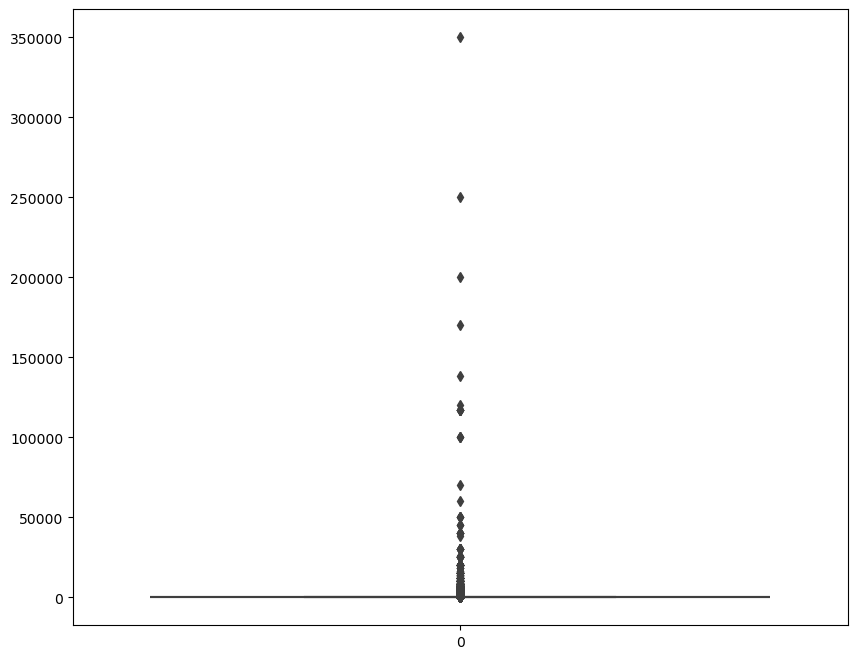

In [11]:
# Checking for outliers

plt.figure (figsize=(10,8))
sns.boxplot(df['amount_tsh'])

<Axes: >

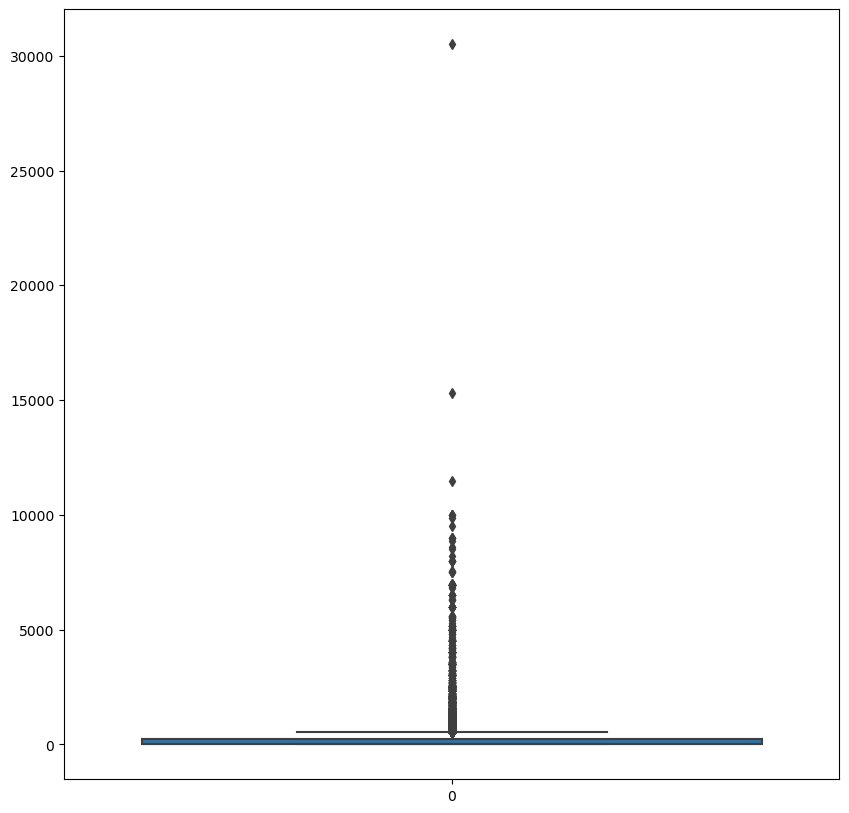

In [12]:
plt.figure(figsize=(10,10))
sns.boxplot(df['population'])

<Axes: >

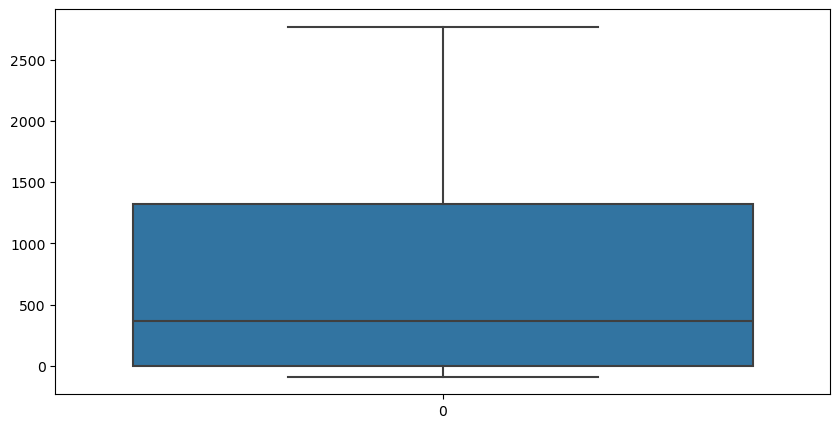

In [13]:
plt.figure(figsize=(10,5))
sns.boxplot(df['gps_height'])

Checking for duplicates

In [14]:
df.duplicated().sum()

0

Checking for null values

In [15]:
df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3637
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     2
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3878
scheme_name              28810
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [16]:
df['scheme_name'].value_counts()

scheme_name
K                       682
Borehole                546
Chalinze wate           405
M                       400
DANIDA                  379
                       ... 
Mradi wa maji Vijini      1
Villagers                 1
Magundi water supply      1
Saadani Chumv             1
Mtawanya                  1
Name: count, Length: 2695, dtype: int64

In [17]:
df['scheme_management'].value_counts()

scheme_management
VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
Name: count, dtype: int64

In [18]:
df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [19]:
# Imputing missing values for Scheme_Name col using "Missing"

df["scheme_name"] = df["scheme_name"].fillna("Missing")


In [20]:
df.isnull().sum()

id                          0
amount_tsh                  0
date_recorded               0
funder                   3637
gps_height                  0
installer                3655
longitude                   0
latitude                    0
wpt_name                    2
num_private                 0
basin                       0
subvillage                371
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting           3334
recorded_by                 0
scheme_management        3878
scheme_name                 0
permit                   3056
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity  

In [21]:
df["public_meeting"].value_counts()

public_meeting
True     51011
False     5055
Name: count, dtype: int64

In [22]:
df['recorded_by'].unique()

array(['GeoData Consultants Ltd'], dtype=object)

# Drop any unnecessary columns

In [23]:
df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [24]:
df.drop(["num_private", "region_code", "extraction_type_group", "management_group", "quality_group", "quantity_group", "source_class", "waterpoint_type_group" ], axis=1, inplace=True)

In [25]:
df.drop(['recorded_by'], axis=1, inplace=True)

In [26]:
df.shape

(59400, 32)

In [27]:
df['status_group'].value_counts()

status_group
functional                 32259
non functional             22824
functional needs repair     4317
Name: count, dtype: int64

Pandas_Groupby

In [28]:
df.groupby(['payment', 'status_group']).size().groupby(level=1).max()

status_group
functional                 11379
functional needs repair     1907
non functional             12062
dtype: int64

In [29]:
df.groupby(['payment', 'status_group']).count()

id  amount_tsh  \
payment               status_group                                 
never pay             functional               11379       11379   
                      functional needs repair   1907        1907   
                      non functional           12062       12062   
other                 functional                 611         611   
                      functional needs repair    118         118   
                      non functional             325         325   
pay annually          functional                2740        2740   
                      functional needs repair    247         247   
                      non functional             655         655   
pay monthly           functional                5482        5482   
                      functional needs repair    927         927   
                      non functional            1891        1891   
pay per bucket        functional                6090        6090   
                      functional needs repair    409         409   
                      non functional            2486        2486   
pay when scheme fails functional                2429        2429   
                      functional needs repair    277         277   
                      non functional            1208        1208   
unknown               functional                3528        3528   
                      functional needs repair    432         432   
                      non functional            4197        4197   

                                               date_recorded  funder  \
payment               status_group                                     
never pay             functional                       11379   10259   
                      functional needs repair           1907    1591   
                      non functional                   12062   11590   
other                 functional                         611     605   
                      functional needs repair            118     113   
                      non functional                     325     320   
pay annually          functional                        2740    2655   
                      functional needs repair            247     227   
                      non functional                     655     651   
pay monthly           functional                        5482    5330   
                      functional needs repair            927     889   
                      non functional                    1891    1865   
pay per bucket        functional                        6090    5868   
                      functional needs repair            409     388   
                      non functional                    2486    2460   
pay when scheme fails functional                        2429    2400   
                      functional needs repair            277     273   
                      non functional                    1208    1196   
unknown               functional                        3528    3160   
                      functional needs repair            432     399   
                      non functional                    4197    3524   

                                               gps_height  installer  \
payment               status_group                                     
never pay             functional                    11379      10258   
                      functional needs repair        1907       1591   
                      non functional                12062      11594   
other                 functional                      611        606   
                      functional needs repair         118        113   
                      non functional                  325        320   
pay annually          functional                     2740       2651   
                      functional needs repair         247        227   
                      non functional                  655        651   
pay monthly           functional    

## Data Visualization

In [30]:
status = df['status_group'].value_counts()
status

status_group
functional                 32259
non functional             22824
functional needs repair     4317
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

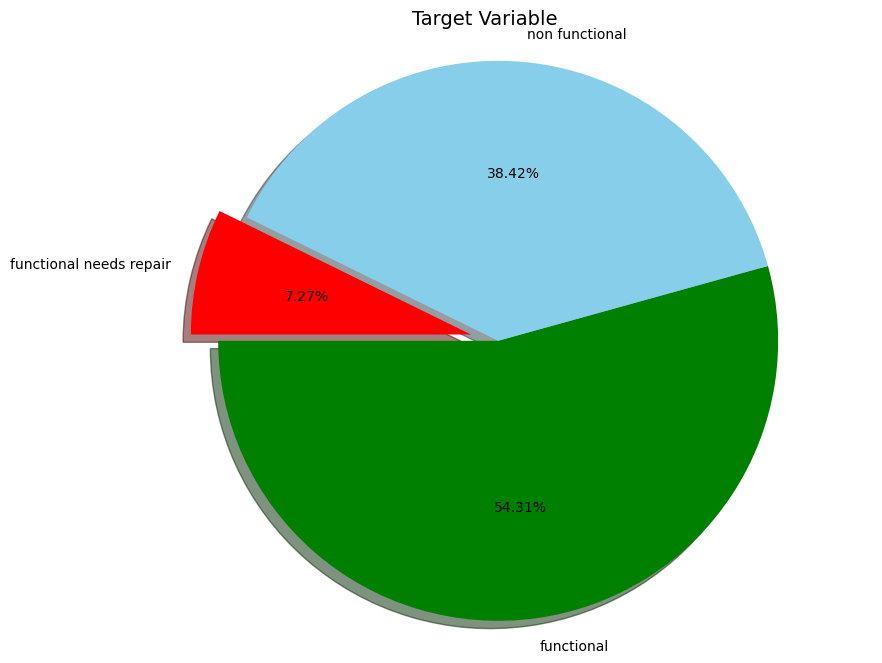

In [31]:
# 1. Visualizing the Distribution for our Target Variable

labels = ['functional', 'non functional', 'functional needs repair']
colors = ['green', 'skyblue', 'red']
fontsize = 14
plt.figure(figsize=(10, 8))
plt.title('Target Variable', fontsize=fontsize)
plt.pie(status, labels=labels, colors = colors, startangle = 180, shadow=True, explode=(0,0,0.1), autopct= '%1.2f%%')
plt.axis('equal')
plt.show


Components of EDA

1. Univariate Analysis
2. Bivariate Analysis
3. Multivariate Analysis

In [32]:
#2. User-defined function for Univariate Analysis

def univariate(column, kind, title, xlabel, ylabel):
  sns.set(font_scale=1)
  if kind == 'pie':
    df[column].value_counts().plot(kind=kind, autopct= '%1.2f%%', figsize=(6,8), rot=90)
  elif kind == 'bar':
    df[column].value_counts().plot(kind=kind, figsize=(6,8), rot=90)
    plt.xlabel(xlabel=xlabel, labelpad=12)
    plt.ylabel(ylabel=ylabel, labelpad=12)
    plt.title(title, y=1)
    return plt.show

In [33]:
df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'basin', 'subvillage',
       'region', 'district_code', 'lga', 'ward', 'population',
       'public_meeting', 'scheme_management', 'scheme_name', 'permit',
       'construction_year', 'extraction_type', 'extraction_type_class',
       'management', 'payment', 'payment_type', 'water_quality', 'quantity',
       'source', 'source_type', 'waterpoint_type', 'status_group'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

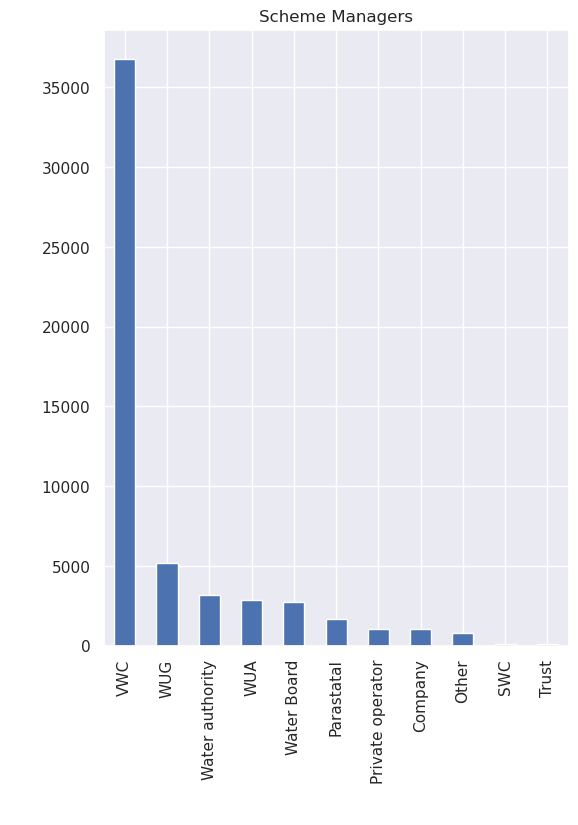

In [34]:
univariate('scheme_management', 'bar', 'Scheme Managers', ' ', ' ')

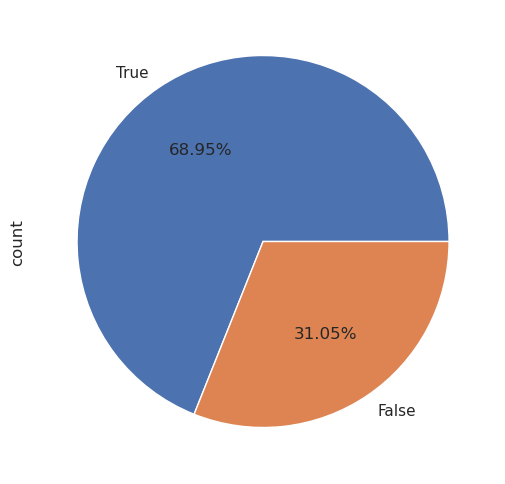

In [35]:
univariate('permit', 'pie', 'Waterpumps Permit Requirment', '', '')

<function matplotlib.pyplot.show(close=None, block=None)>

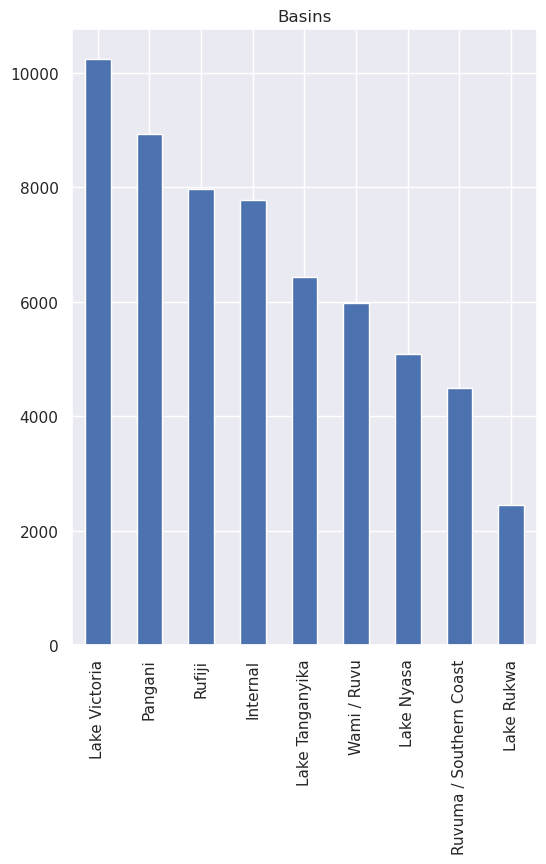

In [36]:
univariate('basin', 'bar', 'Basins', '', '')

**Challenge: Complete Data Cleaning and EDA using this Dataset**

#Titanic Dataset

In [ ]:
# Importing the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [ ]:
titanic_df = pd.read_csv('titanic.csv')
titanic_df.head()

In [ ]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
titanic_df.shape

(891, 12)

This dataset has 891 rows and 12 columns

In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Summary Statistics
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
titanic_df['Pclass'].unique()

array([3, 1, 2])

In [ ]:
titanic_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

## Data Cleaning


1. Check for Outliers
2. Check for Missing Values
3. Check for Duplicates
4. Drop Unnecessary columns


<Axes: >

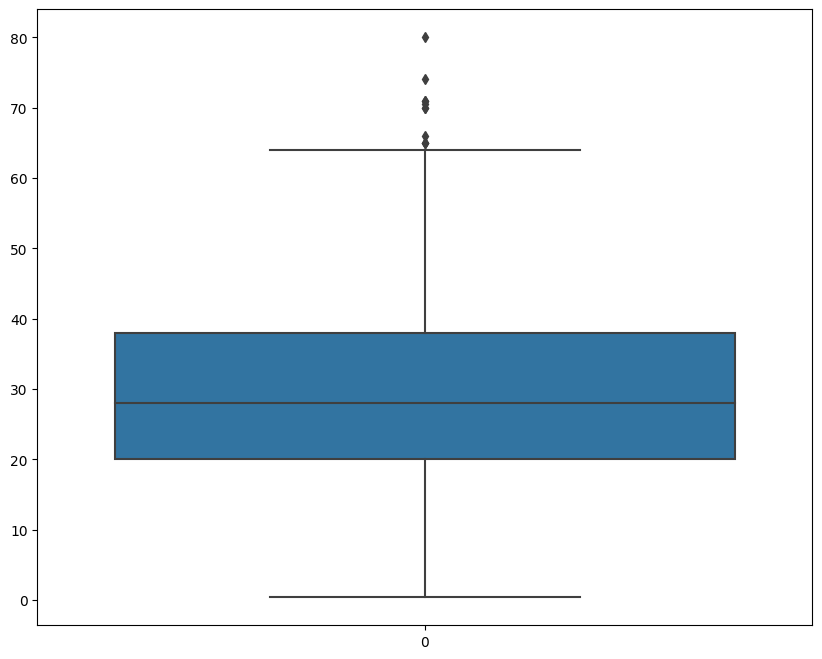

In [ ]:
plt.figure(figsize= (10,8))
sns.boxplot(titanic_df['Age'])

<Axes: >

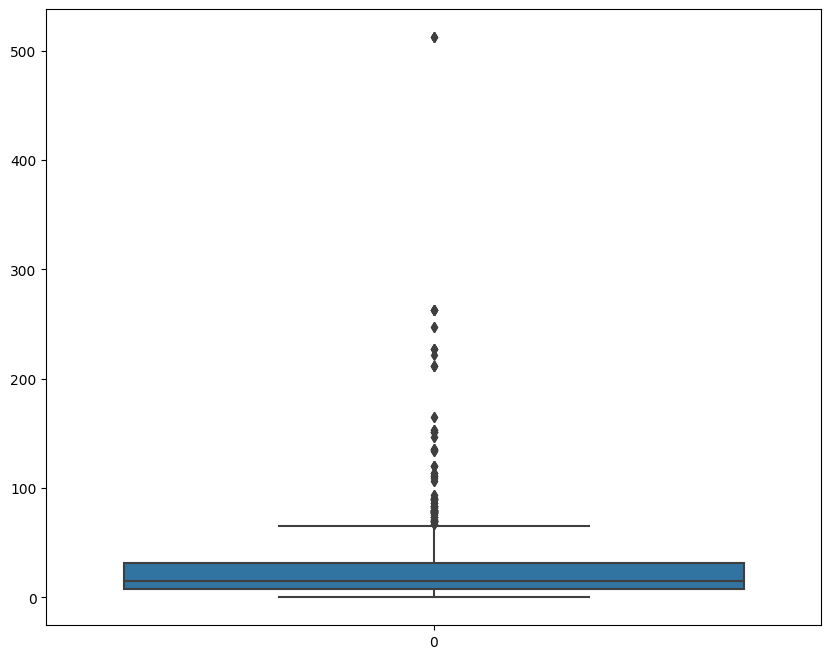

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(titanic_df['Fare'])

In [ ]:
# Checking for missing values

titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
titanic_df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [ ]:
# Checking for duplicates

titanic_df.duplicated().value_counts()

False    891
dtype: int64

In [ ]:
# Dropping unnecessary columns: cabin, name, ticket

titanic_df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)



In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
